In [25]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import random
from statistics import mean

pothole_path = os.getcwd()+'/Dataset/Pothole'
normal_path = os.getcwd()+'/Dataset/Normal'

In [26]:
image_files = os.listdir(pothole_path)
image_files.sort()
index = 1

for image_file in image_files:
    if image_file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        new_filename = f"{index:04d}.jpg"  
        old_path = os.path.join(pothole_path, image_file)
        new_path = os.path.join(pothole_path, new_filename)
        os.rename(old_path, new_path)
        index += 1
print("Pothole images renamed and indexed successfully.")

image_files = os.listdir(normal_path)
image_files.sort()
index = 1

for image_file in image_files:
    if image_file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        new_filename = f"{index:04d}.jpg"         
        old_path = os.path.join(normal_path, image_file)
        new_path = os.path.join(normal_path, new_filename)        
        os.rename(old_path, new_path)        
        index += 1
print("Normal images renamed and indexed successfully.")

Pothole images renamed and indexed successfully.
Normal images renamed and indexed successfully.


File count: 493
File count: 705


Text(0.5, 1.0, 'Dataset Distribution')

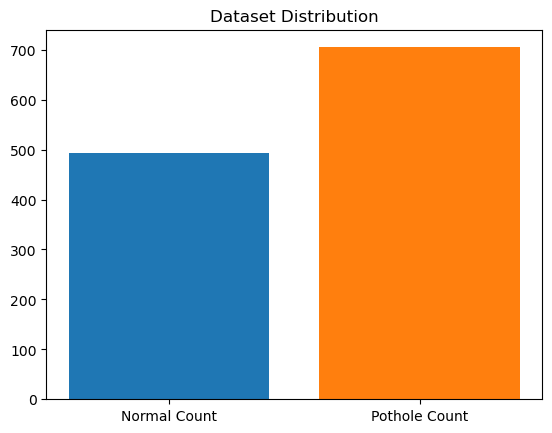

In [27]:
# folder path
Normal_dir_path = r'Dataset/Normal'
Normal_count = 0
# Iterate directory
for path in os.listdir(normal_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(normal_path, path)):
        Normal_count += 1
print('File count:', Normal_count)

Pothole_dir_path = r'Dataset/Pothole/'
Pothole_count = 0
# Iterate directory
for path in os.listdir(pothole_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(pothole_path, path)):
        Pothole_count += 1
print('File count:', Pothole_count)

plt.bar('Normal Count', Normal_count)
plt.bar('Pothole Count', Pothole_count)
plt.title("Dataset Distribution")


In [28]:
pothole_images = [f for f in os.listdir(pothole_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
pothole = []

for image_file in pothole_images:
    image_path = os.path.join(pothole_path, image_file)
    image = cv2.imread(image_path)
    
    if image is not None:
        pothole.append(image)
    else:
        print(f"Could not load image: {image_path}")

normal_images = [f for f in os.listdir(normal_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
normal = []

for image_file in normal_images:
    image_path = os.path.join(normal_path, image_file)
    image = cv2.imread(image_path)
    
    if image is not None:
        normal.append(image)
    else:
        print(f"Could not load image: {image_path}")


In [29]:
print("Max width pixels: " + str(max([i.shape[0] for i in pothole])))
print("Min width pixels: " + str(min([i.shape[0] for i in pothole])))
print("Max height pixels: " + str(max([i.shape[1] for i in pothole])))
print("Min height pixels: " + str(min([i.shape[1] for i in pothole])))
print("Avg width pixels: " + str(mean([i.shape[0] for i in pothole])))
print("Avg height pixels: " + str(mean([i.shape[1] for i in pothole])))

Max width pixels: 2365
Min width pixels: 140
Max height pixels: 3200
Min height pixels: 300
Avg width pixels: 377.47585227272725
Avg height pixels: 490.67897727272725


In [30]:
print("Max width pixels: " + str(max([i.shape[0] for i in normal])))
print("Min width pixels: " + str(min([i.shape[0] for i in normal])))
print("Max height pixels: " + str(max([i.shape[1] for i in normal])))
print("Min height pixels: " + str(min([i.shape[1] for i in normal])))
print("Avg width pixels: " + str(mean([i.shape[0] for i in normal])))
print("Avg height pixels: " + str(mean([i.shape[1] for i in normal])))

Max width pixels: 1024
Min width pixels: 540
Max height pixels: 1024
Min height pixels: 540
Avg width pixels: 644.040650406504
Avg height pixels: 644.040650406504


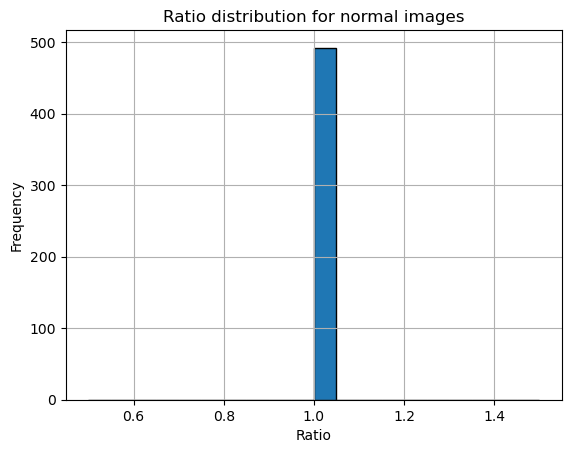

In [31]:
normal_ratio = [i.shape[0] / i.shape[1] for i in normal]
plt.hist(normal_ratio, bins=20, edgecolor='black')  # 'bins' determines the number of bins or bars
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Ratio distribution for normal images')
plt.grid(True)  # Add a grid for clarity, optional
plt.show()

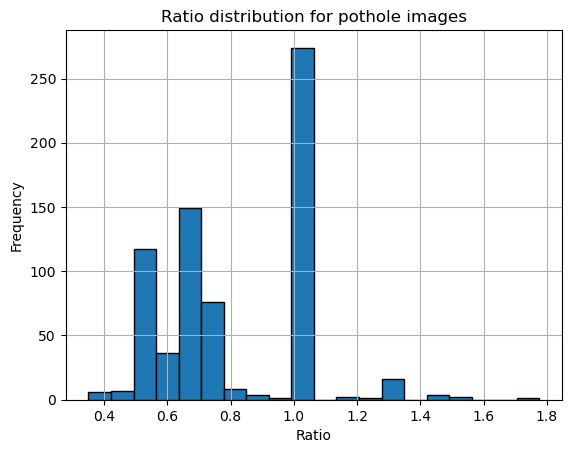

In [32]:
pothole_ratio = [i.shape[0] / i.shape[1] for i in pothole]
plt.hist(pothole_ratio, bins=20, edgecolor='black')  # 'bins' determines the number of bins or bars
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Ratio distribution for pothole images')
plt.grid(True)  # Add a grid for clarity, optional
plt.show()

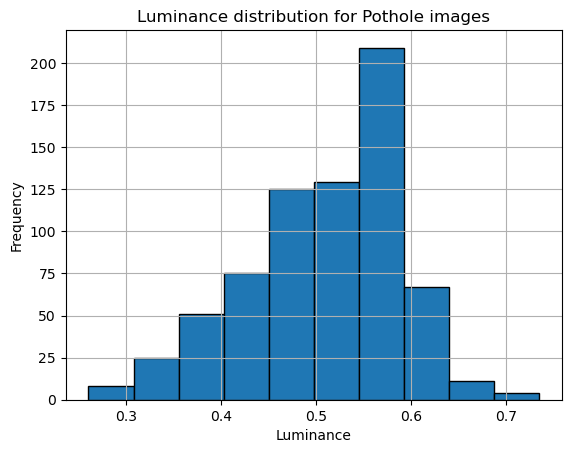

In [33]:
pothole_images = [f for f in os.listdir(pothole_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
pothole = []

for image_file in pothole_images:
    image_path = os.path.join(pothole_path, image_file)
    image = cv2.imread(image_path)
    
    if image is not None:
        pothole.append(image)
    else:
        print(f"Could not load image: {image_path}")

len(pothole)
ph_lst = []
for image in pothole:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb.shape
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    Luminance = np.mean((0.2126*red_channel + 0.7152*green_channel + 0.0722*blue_channel)/255)
    ph_lst.append(Luminance)
plt.hist(ph_lst, bins=10, edgecolor='black')
plt.xlabel('Luminance')
plt.ylabel('Frequency')
plt.title('Luminance distribution for Pothole images')
plt.grid(True)  # Add a grid for clarity, optional
plt.show()

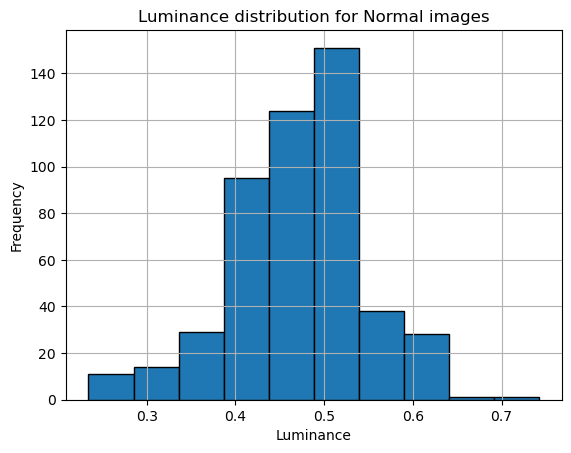

In [34]:
normal_images = [f for f in os.listdir(normal_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
normal = []

for image_file in normal_images:
    image_path = os.path.join(normal_path, image_file)
    image = cv2.imread(image_path)
    
    if image is not None:
        normal.append(image)
    else:
        print(f"Could not load image: {image_path}")

len(normal)

nm_lst = []
for image in normal:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb.shape
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    Luminance = np.mean((0.2126*red_channel + 0.7152*green_channel + 0.0722*blue_channel)/255)
    nm_lst.append(Luminance)
plt.hist(nm_lst, bins=10, edgecolor='black')
plt.xlabel('Luminance')
plt.ylabel('Frequency')
plt.title('Luminance distribution for Normal images')
plt.grid(True)  # Add a grid for clarity, optional
plt.show()

Text(0.5, 1.0, 'Normal_example')

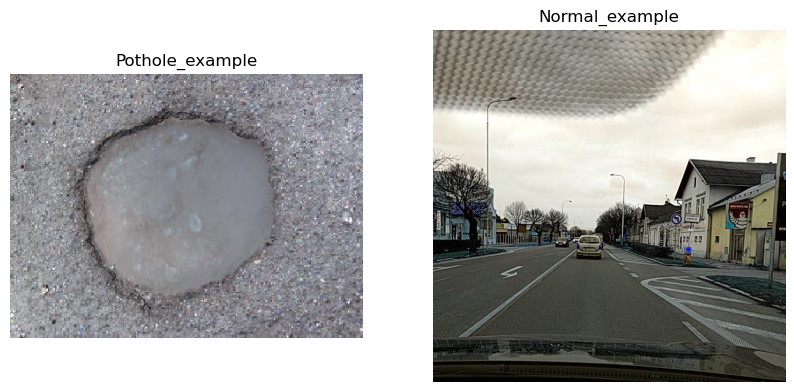

In [35]:
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 2
#Two list of image
pothole_path = os.getcwd()+'/Dataset/Pothole'
normal_path = os.getcwd()+'/Dataset/Normal'
image_norm = os.listdir(normal_path)
image_pot = os.listdir(pothole_path)
#Randomly choose a image from each set
pot_example= random.choice(image_pot)
norm_example = random.choice(image_norm)
Image_1 = cv2.imread(pothole_path+"/"+pot_example)
Image_2 = cv2.imread(normal_path+"/"+norm_example)
#Display the images
fig.add_subplot(rows,columns,1)
plt.imshow(Image_1)
plt.axis('off')
plt.title("Pothole_example")
fig.add_subplot(rows,columns,2)
plt.imshow(Image_2)
plt.axis('off')
plt.title("Normal_example")

In [40]:
import os
from os import listdir
import cv2

size_w = 300
size_d = 300
point = (size_w, size_d)
lst_pothole = []
for images in os.listdir(pothole_path):
    if (images.endswith(".jpg")):
        im = cv2.imread(pothole_path+"/"+images)
        resized_im = cv2.resize(im, point, interpolation=cv2.INTER_LINEAR)
        lst_pothole.append(resized_im)

lst_normal = []
for images in os.listdir(normal_path):
    if (images.endswith(".jpg")):
        im = cv2.imread(normal_path+"/"+images)
        resized_im = cv2.resize(im, point, interpolation=cv2.INTER_LINEAR)
        lst_normal.append(resized_im)

normal = lst_normal
pothole = lst_pothole


492